In [3]:
import numpy as np
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

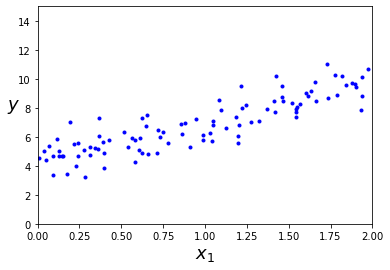

In [5]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])

plt.show()

In [13]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.21509616],
       [2.77011339]])

# Same as above but using sklearn

In [14]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [8]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

# Same as above but using sklearn

In [15]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [16]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# Same as above 

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the pseudoinverse of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly:

In [17]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

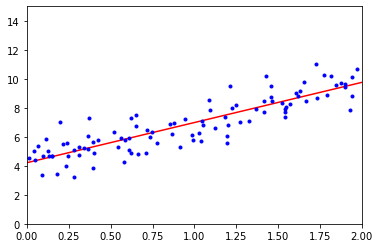

In [9]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

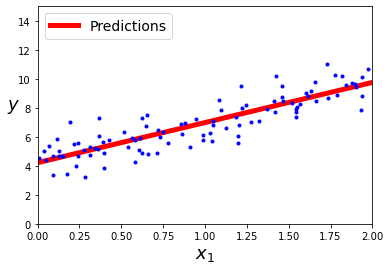

In [12]:
plt.plot(X_new, y_predict, "r-", linewidth=5, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
#save_fig("linear_model_predictions_plot")
plt.show()

# “Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.”


This algorithm is useful in cases where the optimal points cannot be found by equating the slope of the function to 0. In the case of linear regression, you can mentally map the sum of squared residuals as the function “y” and the weight vector as “x” in the parabola above.

# How to move down in steps?


This is the crux of the algorithm. The general idea is to start with a random point (in our parabola example start with a random “x”) and find a way to update this point with each iteration such that we descend the slope.

# The steps of the algorithm are

* 1) Find the slope of the objective function with respect to each parameter/feature. In other words, compute the gradient of the function.

* 2) Pick a random initial value for the parameters. (To clarify, in the parabola example, differentiate “y” with respect to “x”. If we had more features like x1, x2 etc., we take the partial derivative of “y” with respect to each of the features.)

* 3) Update the gradient function by plugging in the parameter values.

* 4) Calculate the step sizes for each feature as : step size = gradient * learning rate.

* 5) Calculate the new parameters as : new params = old params -step size

* 6) Repeat steps 3 to 5 until gradient is almost 0.

The “learning rate” mentioned above is a flexible parameter which heavily influences the convergence of the algorithm. Larger learning rates make the algorithm take huge steps down the slope and it might jump across the minimum point thereby missing it. So, it is always good to stick to low learning rate such as 0.01. It can also be mathematically shown that gradient descent algorithm takes larger steps down the slope if the starting point is high above and takes baby steps as it reaches closer to the destination to be careful not to miss it and also be quick enough.

# Linear regression using batch gradient descent

In [18]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [19]:
theta

array([[4.21509616],
       [2.77011339]])

In [20]:
X_new_b.dot(theta)

array([[4.21509616],
       [9.75532293]])

In [21]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

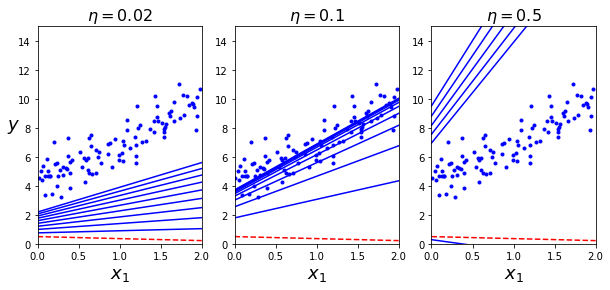

In [23]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)


plt.show()

# DOWNSIDES OF BATCH GRADIENT DESCENT

There are a few downsides of the gradient descent algorithm. We need to take a closer look at the amount of computation we make for each iteration of the algorithm.


Say we have 10,000 data points and 10 features. The sum of squared residuals consists of as many terms as there are data points, so 10000 terms in our case. We need to compute the derivative of this function with respect to each of the features, so in effect we will be doing 10000 * 10 = 100,000 computations per iteration. It is common to take 1000 iterations, in effect we have 100,000 * 1000 = 100000000 computations to complete the algorithm. That is pretty much an overhead and hence gradient descent is slow on huge data.


Stochastic gradient descent comes to our rescue !! “Stochastic”, in plain terms means “random”.

# Stochastic Gradient Descent

Stochastic gradient descent comes to our rescue !! “Stochastic”, in plain terms means “random”.

# Where can we potentially induce randomness in our gradient descent algorithm??

Yes, you might have guessed it right !! It is while selecting data points at each step to calculate the derivatives. SGD randomly picks one data point from the whole data set at each iteration to reduce the computations enormously.
It is also common to sample a small number of data points instead of just one point at each step and that is called “mini-batch” gradient descent. Mini-batch tries to strike a balance between the goodness of gradient descent and speed of SGD.

In [24]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

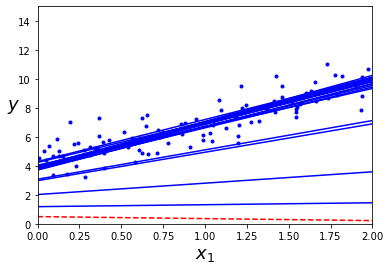

In [25]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
                                # not shown
plt.show()           

In [26]:
theta

array([[4.21076011],
       [2.74856079]])

In [27]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [28]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

# Mini-Batch Gradient Descent:

Algorithm-

Let theta = model parameters and max_iters = number of epochs.

for itr = 1, 2, 3, …, max_iters:
for mini_batch (X_mini, y_mini):

Forward Pass on the batch X_mini:
Make predictions on the mini-batch
Compute error in predictions (J(theta)) with the current values of the parameters

Backward Pass:
Compute gradient(theta) = partial derivative of J(theta) w.r.t. theta
Update parameters:
theta = theta – learning_rate*gradient(theta)
Below is the Python Implementation:

# Mini-batch Gradient Descent
. The main advantage of Mini-batch GD over Stochastic GD is that you can
get a performance boost from hardware optimization of matrix operations, especially
when using GPUs.

paths taken by the three Gradient Descent algorithms in parameter space during
training. They all end up near the minimum, but Batch GD’s path actually stops at the
minimum, while both Stochastic GD and Mini-batch GD continue to walk around.
However, don’t forget that Batch GD takes a lot of time to take each step, and Stochas‐
tic GD and Mini-batch GD would also reach the minimum if you used a good learn‐
ing schedule.


In [29]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [30]:
theta

array([[4.25214635],
       [2.7896408 ]])

In [31]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

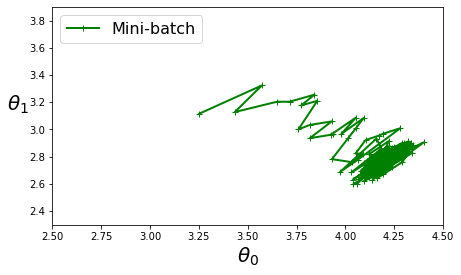

In [33]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

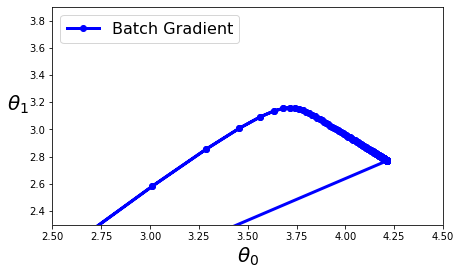

In [35]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch Gradient")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

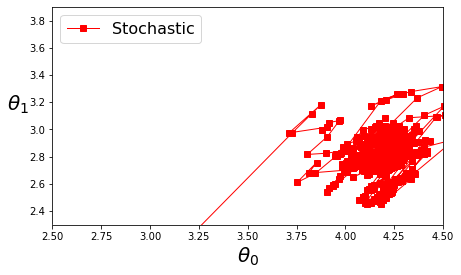

In [36]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()

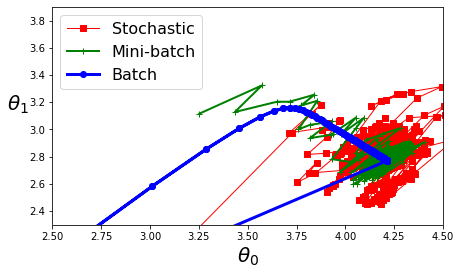

In [37]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])

plt.show()